In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib
from scipy.fftpack import fft,ifft

matplotlib.rcParams['xtick.labelsize'] = 25
matplotlib.rcParams['ytick.labelsize'] = 25
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'
matplotlib.rcParams['xtick.major.size'] = 8
matplotlib.rcParams['ytick.major.size'] = 8
matplotlib.rcParams['xtick.minor.size'] = 4
matplotlib.rcParams['ytick.minor.size'] = 4
matplotlib.rcParams['xtick.top'] = True
matplotlib.rcParams['ytick.right'] = True
matplotlib.rcParams['axes.labelpad'] = 8.0
matplotlib.rcParams['figure.constrained_layout.h_pad'] = 0
plt.rcParams['text.usetex'] = True
plt.rc('text', usetex=True)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.rcParams['font.sans-serif'] = ['Times New Roman']

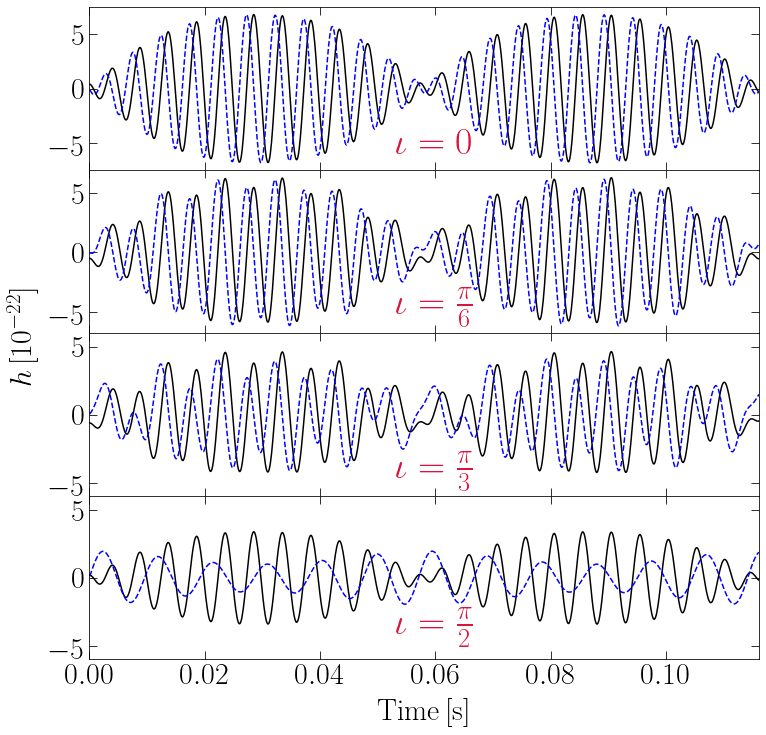

In [2]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True,  sharey=False, figsize=(12,12))
plt.subplots_adjust(hspace=0.0)
data1 = np.genfromtxt('data/large0.dat')

t=data1[:,0]
hp1=data1[:,1]
hc1=data1[:,2]
ax1.plot(t, hp1/10**(-22), linewidth=1.5,label=r'$h_{+}$', color='k')
ax1.plot(t, hc1/10**(-22), linewidth=1.5,label=r'$h_{\times}$',color='b',linestyle='--')
# ax1.text(0.5,0.5,"ad")
# ax1.set_ylabel(r'$h(10^{-22})$',fontsize=30)

data2 = np.genfromtxt('data/large30.dat')

t=data2[:,0]
hp2=data2[:,1]
hc2=data2[:,2]

ax2.plot(t, hp2/10**(-22), linewidth=1.5,label=r'$h_{+}$', color='k')
ax2.plot(t, hc2/10**(-22), linewidth=1.5,label=r'$h_{\times}$',color='b',linestyle='--')

# ax2.set_ylabel(r'$h(10^{-22})$',fontsize=30)
# plt.legend(fontsize=20)


data3 = np.genfromtxt('data/large60.dat')

t=data3[:,0]
hp3=data3[:,1]
hc3=data3[:,2]

ax3.plot(t, hp3/10**(-22), linewidth=1.5,label=r'$h_{+}$',color='k')
ax3.plot(t, hc3/10**(-22), linewidth=1.5,label=r'$h_{\times}$',color='b',linestyle='--')

# ax3.set_ylabel(r'$h(10^{-22})$',fontsize=30)
ax3.set_ylim(-6,6)
# plt.legend(fontsize=20)

data4 = np.genfromtxt('data/large90.dat')

t=data4[:,0]
hp4=data4[:,1]
hc4=data4[:,2]

ax4.plot(t, hp4/10**(-22), linewidth=1.5,label=r'$h_{+}$',color='k')
ax4.plot(t, hc4/10**(-22), linewidth=1.5,label=r'$h_{\times}$',color='b',linestyle='--')

# ax4.set_ylabel(r'$h(10^{-22})$',fontsize=30)
# plt.legend(fontsize=20)
ax4.set_xlabel(r'$\rm{Time\,[s]}$',fontsize=30)
ax4.set_ylim(-6,6)
ax1.tick_params(labelsize=30)
ax2.tick_params(labelsize=30)
ax3.tick_params(labelsize=30)
ax4.tick_params(labelsize=30)
ax4.set_xlim(0,0.1161)
fig.text(0.03, 0.5,r'$h\,[10^{-22}]$', va='center', rotation='vertical',fontsize=30)
fig.text(0.48,0.71,r'$\iota=0$', fontsize=38, color='crimson')
fig.text(0.48,0.51,r'$\iota=\frac{\pi}{6}$', fontsize=38, color='crimson')
fig.text(0.48,0.32,r'$\iota=\frac{\pi}{3}$', fontsize=38, color='crimson')
fig.text(0.48,0.14,r'$\iota=\frac{\pi}{2}$', fontsize=38, color='crimson')
plt.savefig('image/gw_large.pdf', format='pdf', bbox_inches="tight")

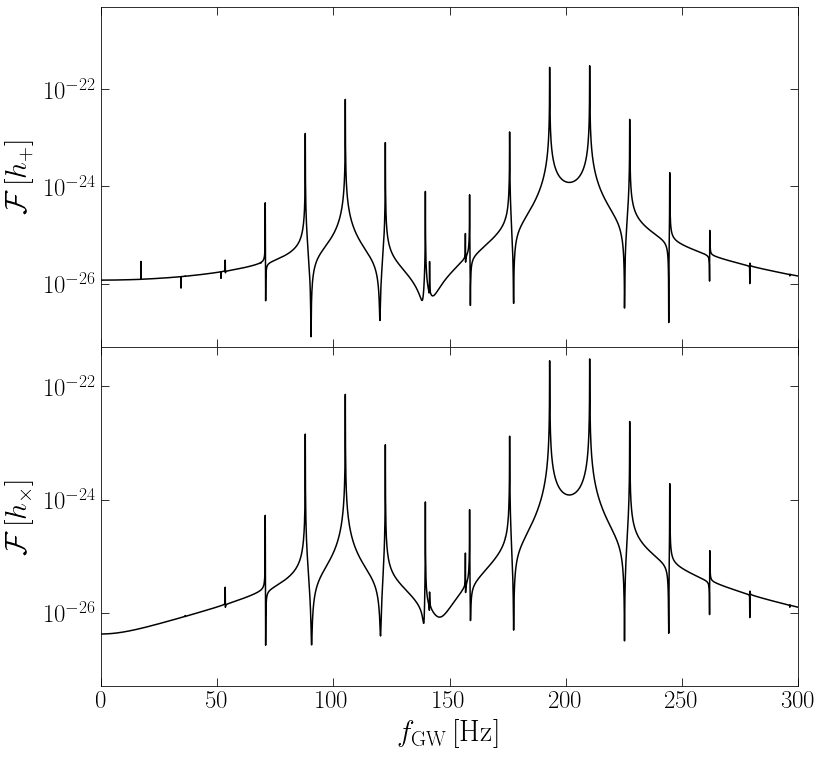

In [3]:
fig, (ax2, ax3) = plt.subplots(2, figsize=(12.5,12.5),sharex=True)
matplotlib.rcParams['xtick.labelsize'] = 30
matplotlib.rcParams['ytick.labelsize'] = 30
plt.subplots_adjust(hspace=0.0)


data2 = np.genfromtxt('data/large_FFT.dat')

t2=data2[:,0]
hp2=data2[:,1]
hc2=data2[:,2]

hp=np.nan_to_num(hp2)
fft_hp = fft(hp)
n2=len(t2)
T=t2[-1]/(n2-1)
xf2= np.linspace(0.0, 1.0/(2.0*T), n2//2)
ps2 = 2.0/n2 * np.abs(fft_hp[0:n2//2])
ax2.semilogy(xf2, ps2, linewidth=1.5,color='k')
# ax2.set_xlabel(r'$\rm{f_{GW}\,[{Hz}]}$',fontsize=25)
ax2.set_ylabel(r'$\mathcal{F}\,[h_{+}]$',fontsize=30)
ax2.set_xlim(0,60)
ax2.set_ylim(5*1e-28,5*1e-21)
# ax2.set_yticks([1e-25,1e-24,1e-23,1e-22,1e-21, 1e-20])

data3 = np.genfromtxt('data/large_FFT.dat')
t3=data3[:,0]
hp3=data3[:,1]
hc3=data3[:,2]
hp=np.nan_to_num(hc3)
fft_hp = fft(hp)
n2=len(t3)
T=t3[-1]/(n2-1)
xf3= np.linspace(0.0, 1.0/(2.0*T), n2//2)
ps3 = 2.0/n2 * np.abs(fft_hp[0:n2//2])
ax3.semilogy(xf3, ps3,linewidth=1.5,color='k')
ax3.set_xlabel(r'$f_{\rm{GW}}\,[\rm{Hz}]$',fontsize=30)
ax3.set_ylabel(r'$\mathcal{F}\,[h_{\times}]$',fontsize=30)
ax3.set_xlim(0,300)
ax3.set_ylim(5*1e-28,5*1e-22)
# ax3.set_yticks([1e-25,1e-24,1e-23,1e-22,1e-21])
plt.savefig("image/gw_large_fft.pdf", format='pdf', bbox_inches="tight")